<a href="https://colab.research.google.com/github/helya02/HomeWorks/blob/main/ML_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data


In [1]:
import pandas as pd

# Load data
train_df = pd.read_csv('/content/train_credit_data.csv')
test_df = pd.read_csv('/content/test_credit_data.csv')

# Preview the first few rows
print(train_df.head())

# Check shape and info
print("Training set shape:", train_df.shape)
print(train_df.info())

       Income  DebtToIncome  CreditHistory  LatePayments  Employment  \
0  101.692304      6.046014      12.538993             2    3.371397   
1   65.263115     20.920108      16.524981             2    2.558994   
2   83.760685     20.932257       6.834911             0    5.294267   
3   73.293188     16.535676      12.673553             0    1.043815   
4   76.857072     19.444921      10.359301             2    0.000000   

   CreditLines  LoanAmount  HomeOwnership        Age    Savings  Education  \
0            2  223.749888              0  29.654235  63.632573          3   
1            4   39.948799              1  42.493071  61.098483          2   
2            2  206.694898              1  41.379374  82.461972          4   
3            4  120.734710              1  50.546432  80.630408          2   
4            7   97.532696              0  29.366066  39.001485          3   

   ReliabilityScore Risk_Label  
0          4.387126    Average  
1          5.378843    Average  

In [7]:
# Preview the first few rows
print(test_df.head())

# Check shape and info
print("Test set shape:", test_df.shape)
print(test_df.info())

       Income  DebtToIncome  CreditHistory  LatePayments  Employment  \
0  102.183288     29.251776      14.358476             0    2.355237   
1   76.504862     17.439537       7.218960             0    7.199254   
2   92.705715     17.316174      19.552619             1    3.220039   
3   50.969852     14.505600       8.192735             2    0.382309   
4   96.030852     28.202591       2.626863             0    7.759396   

   CreditLines  LoanAmount  HomeOwnership        Age    Savings  Education  \
0            3   92.175948              0  42.496307  45.159063          5   
1            4  127.736658              0  48.002023  54.639346          2   
2            5  193.682271              1  34.117933  57.592317          3   
3            3  146.931570              1  29.422537  41.860780          3   
4            3   43.495935              1  31.638967  50.984073          5   

   ReliabilityScore Risk_Label  
0         13.880731       Poor  
1          6.736591    Average  

In [2]:
print("Missing values in training set:\n", train_df.isnull().sum())

Missing values in training set:
 Income              0
DebtToIncome        0
CreditHistory       0
LatePayments        0
Employment          0
CreditLines         0
LoanAmount          0
HomeOwnership       0
Age                 0
Savings             0
Education           0
ReliabilityScore    0
Risk_Label          0
dtype: int64


In [8]:
print("Missing values in test set:\n", test_df.isnull().sum())

Missing values in test set:
 Income              0
DebtToIncome        0
CreditHistory       0
LatePayments        0
Employment          0
CreditLines         0
LoanAmount          0
HomeOwnership       0
Age                 0
Savings             0
Education           0
ReliabilityScore    0
Risk_Label          0
dtype: int64


<ipython-input-35-32da6b054685>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Risk_Label', palette={'Good': 'orange', 'Average': 'blue', 'Poor': 'green'})


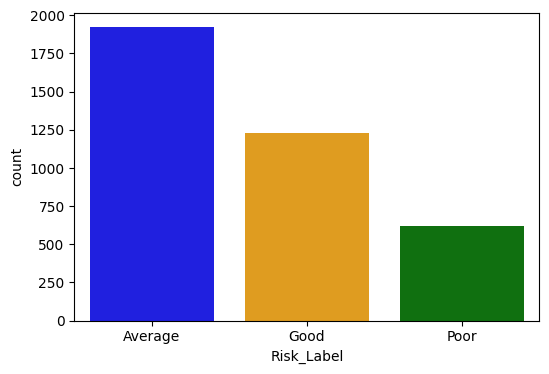

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Risk_Label', palette={'Good': 'orange', 'Average': 'blue', 'Poor': 'green'})

plt.show()


<ipython-input-36-772bed13eba6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_df, x='Risk_Label', palette={'Good': 'orange', 'Average': 'blue', 'Poor': 'green'})


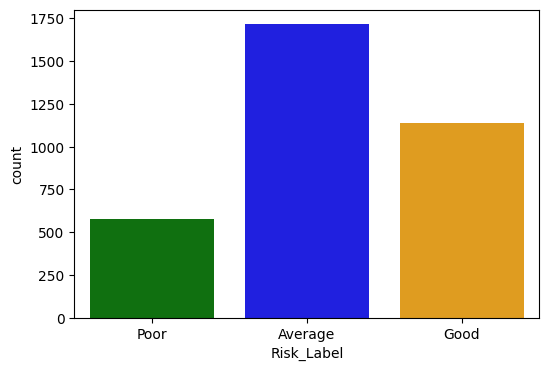

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=test_df, x='Risk_Label', palette={'Good': 'orange', 'Average': 'blue', 'Poor': 'green'})

plt.show()

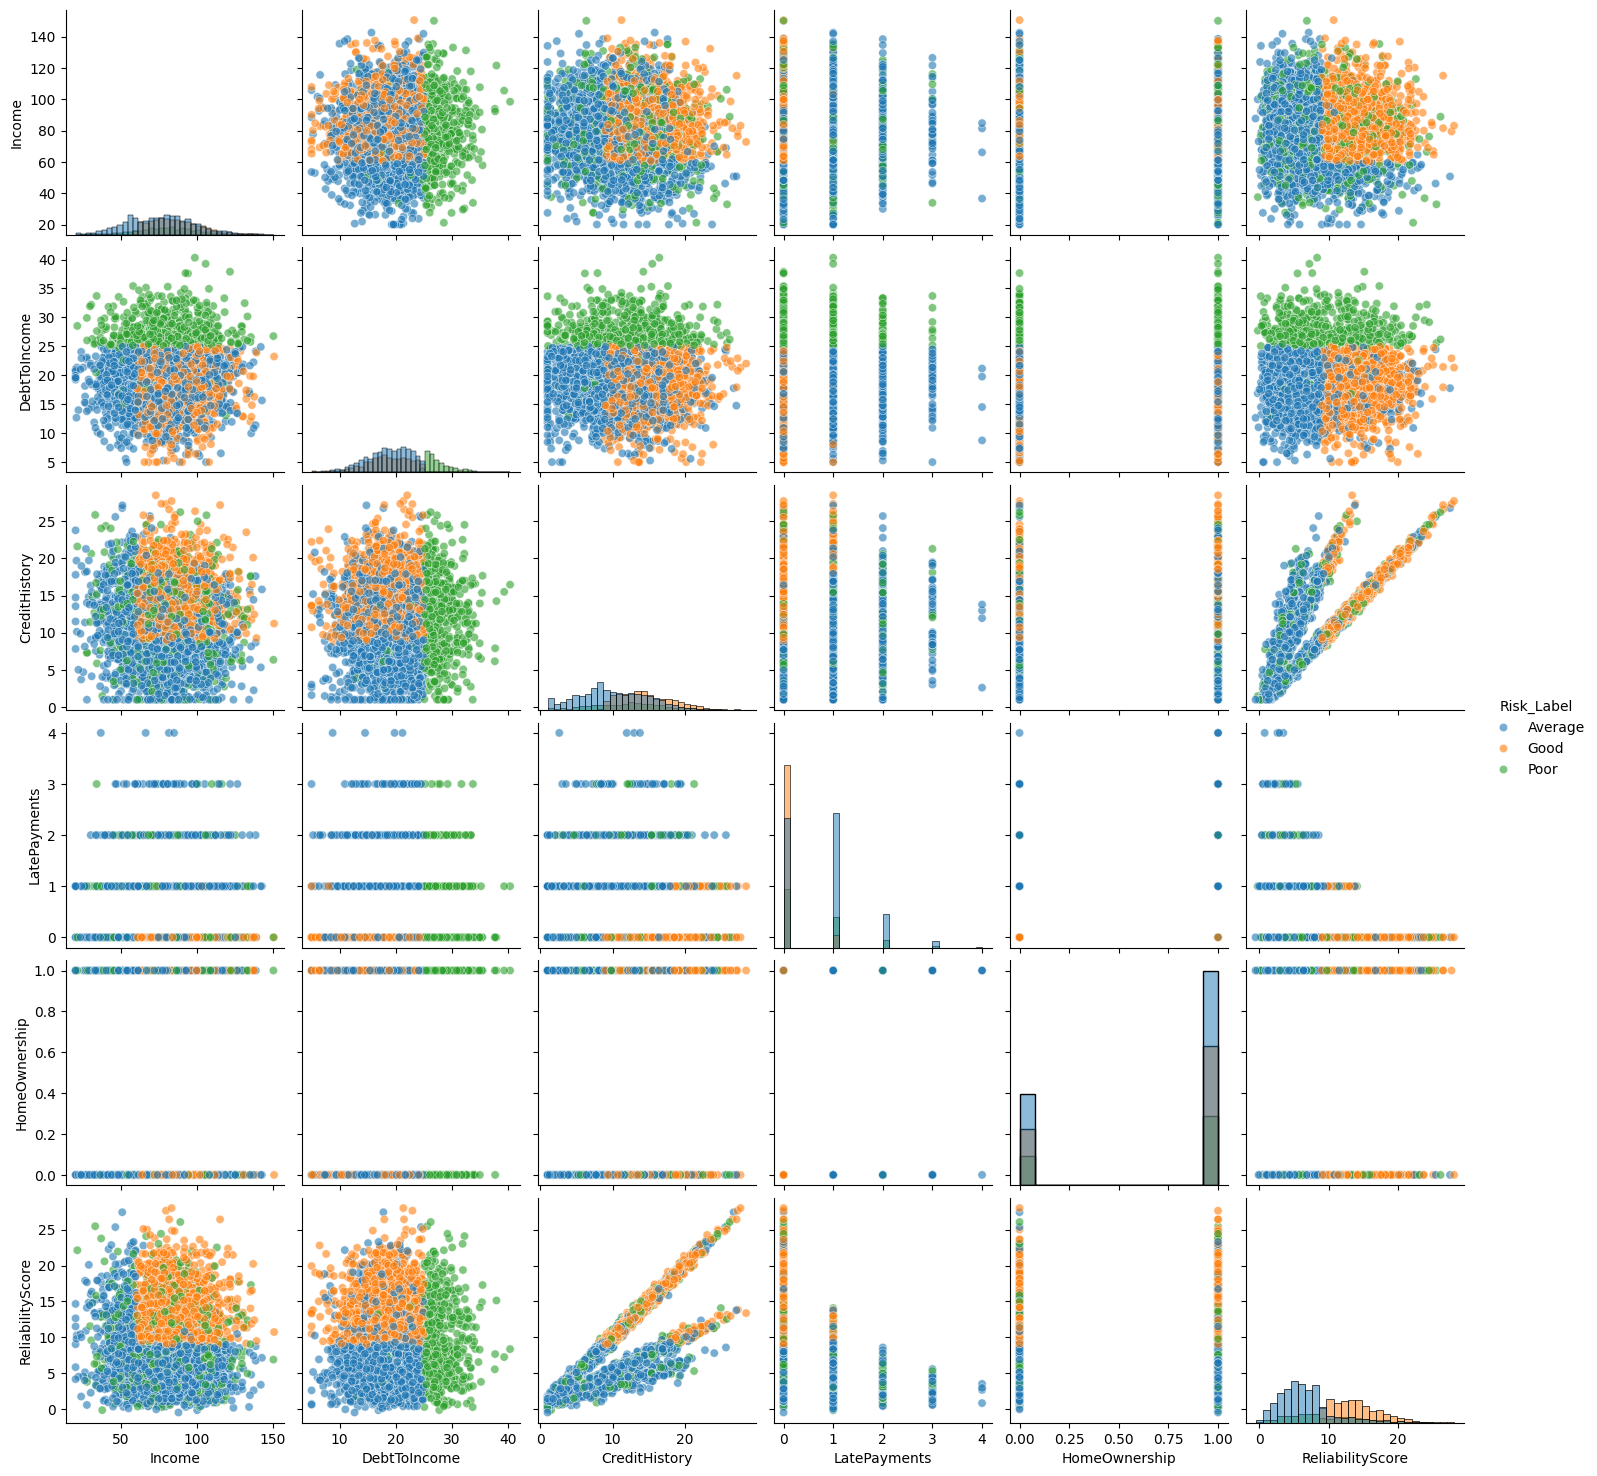

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick a subset of features to make it readable (you can rotate features)
selected_features = ['Income', 'DebtToIncome','CreditHistory','LatePayments','HomeOwnership', 'ReliabilityScore', 'Risk_Label']

# Create pairplot
sns.pairplot(train_df[selected_features], hue='Risk_Label', diag_kind='hist', plot_kws={'alpha': 0.6})

plt.show()

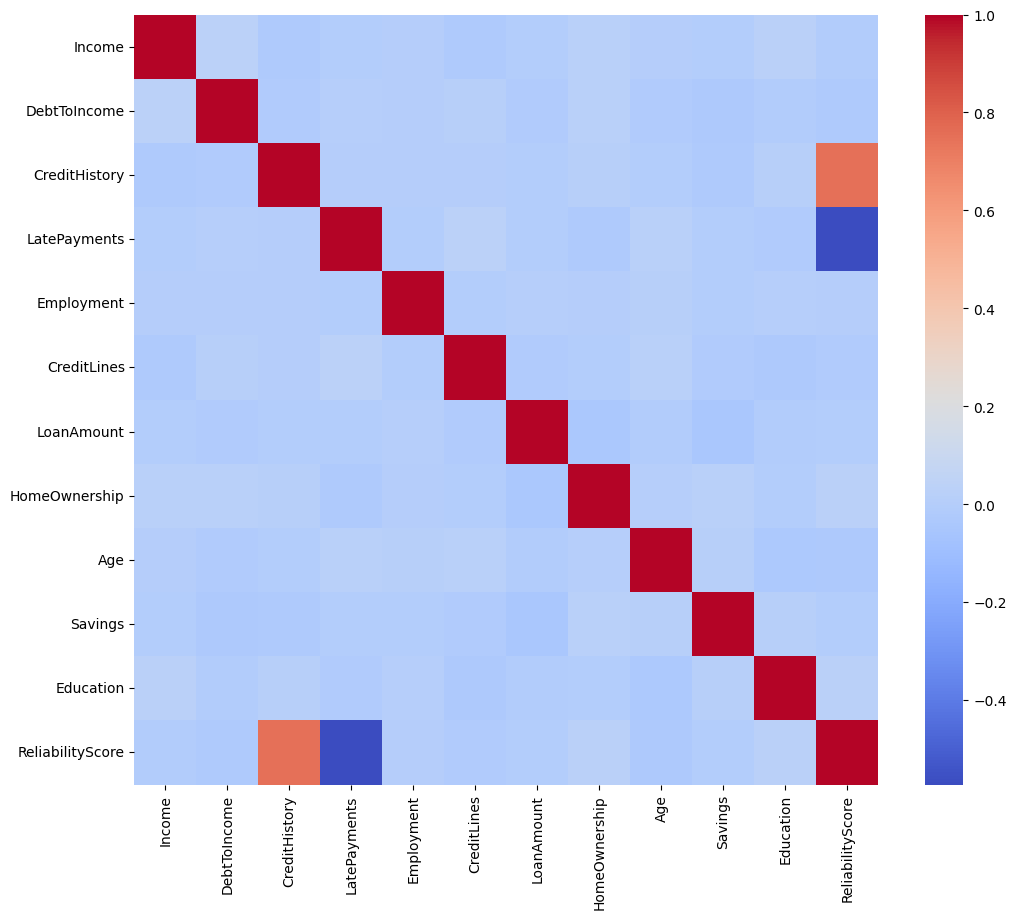

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df[features].corr(), annot=False, cmap='coolwarm')

plt.show()

With Library

In [20]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:

train_df = pd.read_csv('/content/train_credit_data.csv')
test_df = pd.read_csv('/content/test_credit_data.csv')


X_train = train_df.drop(columns=['Risk_Label'])
y_train = train_df['Risk_Label']

X_test = test_df.drop(columns=['Risk_Label'])
y_test = test_df['Risk_Label']

In [58]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_tree = grid.best_estimator_

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy: {:.4f}".format(grid.best_score_))

# Show all results (optional, useful for comparison)
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df[['params', 'mean_test_score', 'mean_train_score']]
print("\nAll Grid Search Results:")
print(results_df.sort_values(by='mean_test_score', ascending=False))

# Evaluate best model on test set
best_tree = grid.best_estimator_

train_acc = accuracy_score(y_train, best_tree.predict(X_train))
test_acc = accuracy_score(y_test, best_tree.predict(X_test))

print("\nFinal Accuracy on Training Set: {:.4f}".format(train_acc))
print("Final Accuracy on Test Set: {:.4f}".format(test_acc))

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validated Accuracy: 0.9817

All Grid Search Results:
                                               params  mean_test_score  \
20  {'criterion': 'entropy', 'max_depth': 3, 'min_...         0.981710   
19  {'criterion': 'entropy', 'max_depth': 3, 'min_...         0.981710   
18  {'criterion': 'entropy', 'max_depth': 3, 'min_...         0.981710   
5   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.981179   
4   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.981179   
3   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.981179   
23  {'criterion': 'entropy', 'max_depth': 5, 'min_...         0.980914   
22  {'criterion': 'entropy', 'max_depth': 5, 'min_...         0.980383   
21  {'criterion': 'entropy', 'max_depth': 5, 'min_...         0.980383   
8   {'criterion': 'gini', 'max_depth': 5, 'min_sam...         0.980118   
6   {'criterion': 'gini', 'max_depth': 5

In [62]:
import pandas as pd

# Extract key info from GridSearchCV
results_df = pd.DataFrame(grid.cv_results_)

# Clean up and format
results_table = results_df[['param_criterion', 'param_max_depth', 'param_min_samples_split',
                            'mean_train_score', 'mean_test_score']]

# Sort by test accuracy (descending)
results_table = results_table.sort_values(by='mean_test_score', ascending=False)

# Display top N configs (optional)
print(results_table.head(10))  # You can include this table in your report

   param_criterion param_max_depth  param_min_samples_split  mean_train_score  \
20         entropy               3                       10          0.982768   
19         entropy               3                        5          0.982768   
18         entropy               3                        2          0.982768   
5             gini               3                       10          0.982635   
4             gini               3                        5          0.982635   
3             gini               3                        2          0.982635   
23         entropy               5                       10          0.983563   
22         entropy               5                        5          0.983762   
21         entropy               5                        2          0.983828   
8             gini               5                       10          0.984226   

    mean_test_score  
20         0.981710  
19         0.981710  
18         0.981710  
5          0.981179 

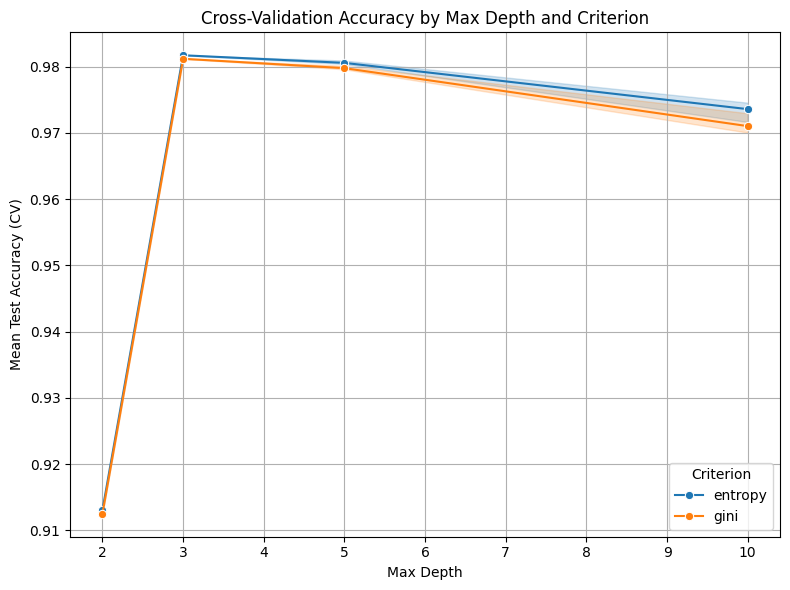

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a plot of max_depth vs. mean_test_score
plt.figure(figsize=(8,6))
sns.lineplot(data=results_table, x='param_max_depth', y='mean_test_score', hue='param_criterion', marker='o')
plt.title('Cross-Validation Accuracy by Max Depth and Criterion')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Accuracy (CV)')
plt.legend(title='Criterion')
plt.grid(True)
plt.tight_layout()
plt.show()

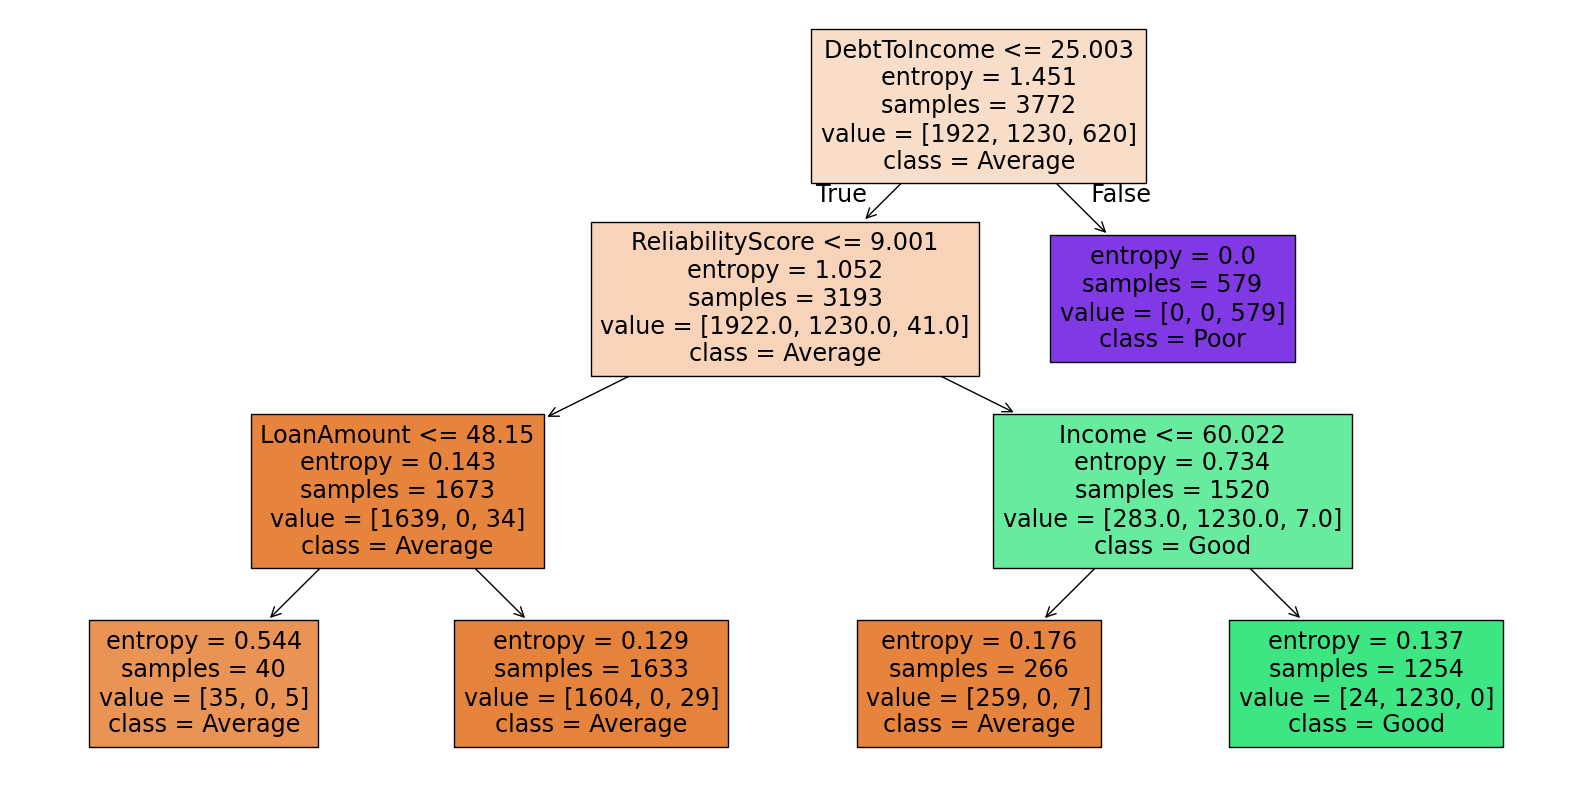

In [55]:
plt.figure(figsize=(20,10))
plot_tree(best_tree, feature_names=X_train.columns, class_names=best_tree.classes_, filled=True)

plt.show()

In [135]:
from graphviz import Digraph
from sklearn.tree import _tree

def draw_tree(tree, feature_names):
    dot = Digraph()

    def recurse(node_id):
        node = tree.tree_
        if node.children_left[node_id] == _tree.TREE_LEAF:  # Leaf node
            prediction = tree.classes_[node.value[node_id].argmax()]
            dot.node(str(node_id), f"Predict: {prediction}", shape="box")
        else:
            feature = feature_names[node.feature[node_id]]
            threshold = node.threshold[node_id]
            label = f"{feature} <= {threshold:.4f}"

            dot.node(str(node_id), label, shape="ellipse")

            left_id = node.children_left[node_id]
            right_id = node.children_right[node_id]

            dot.edge(str(node_id), str(left_id), "True")
            dot.edge(str(node_id), str(right_id), "False")

            recurse(left_id)
            recurse(right_id)

    recurse(0)  # Start from root node
    return dot

# Generate and save the decision tree plot
dot = draw_tree(best_tree, X_train.columns)
dot.render("decision_tree", format="png", cleanup=True)  # Save as PNG
dot.view()  # Open the image


'decision_tree.pdf'

Classification Report (Train Set):
               precision    recall  f1-score   support

     Average       0.98      0.99      0.98      1922
        Good       0.98      1.00      0.99      1230
        Poor       1.00      0.93      0.97       620

    accuracy                           0.98      3772
   macro avg       0.99      0.97      0.98      3772
weighted avg       0.98      0.98      0.98      3772



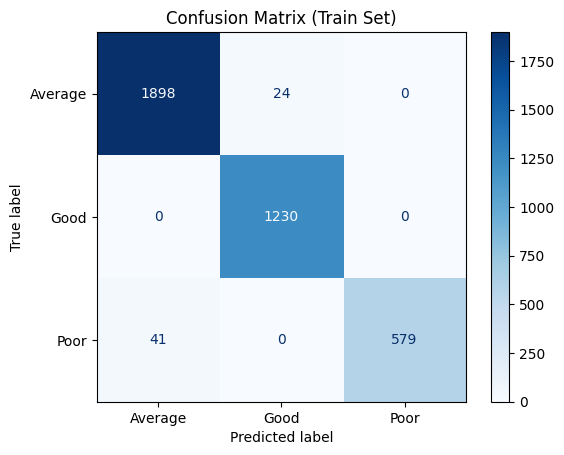

Classification Report (Test Set):
               precision    recall  f1-score   support

     Average       0.98      0.98      0.98      1716
        Good       0.97      1.00      0.98      1137
        Poor       1.00      0.93      0.96       575

    accuracy                           0.98      3428
   macro avg       0.98      0.97      0.98      3428
weighted avg       0.98      0.98      0.98      3428



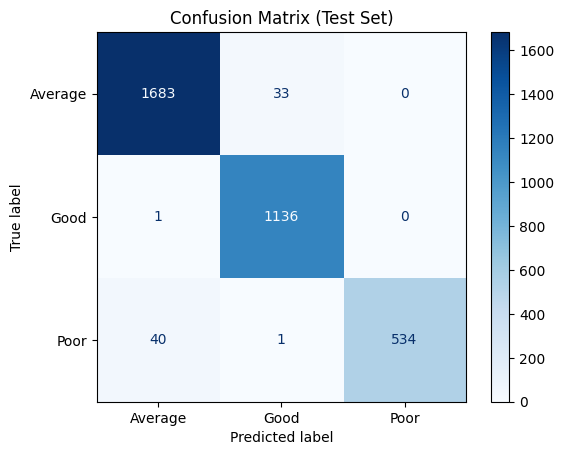

In [66]:
def evaluate_model(model, X, y, title=''):
    y_pred = model.predict(X)
    print(f"Classification Report ({title}):\n", classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix ({title})')
    plt.show()

evaluate_model(best_tree, X_train, y_train, 'Train Set')
evaluate_model(best_tree, X_test, y_test, 'Test Set')

Classification Report (Unpruned - Train):
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00      1922
        Good       1.00      1.00      1.00      1230
        Poor       1.00      1.00      1.00       620

    accuracy                           1.00      3772
   macro avg       1.00      1.00      1.00      3772
weighted avg       1.00      1.00      1.00      3772



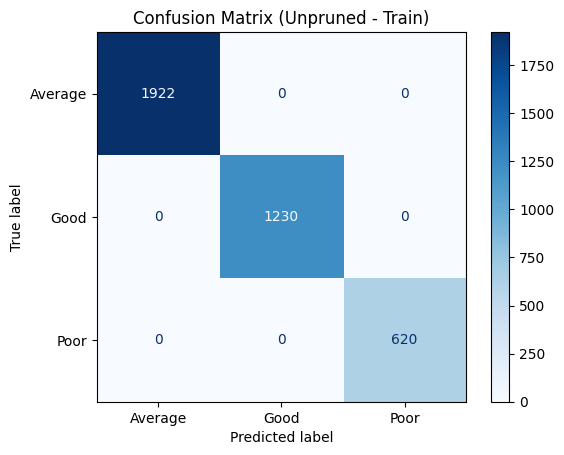

Classification Report (Unpruned - Test):
               precision    recall  f1-score   support

     Average       0.96      0.95      0.96      1716
        Good       0.97      0.97      0.97      1137
        Poor       0.91      0.93      0.92       575

    accuracy                           0.96      3428
   macro avg       0.95      0.95      0.95      3428
weighted avg       0.96      0.96      0.96      3428



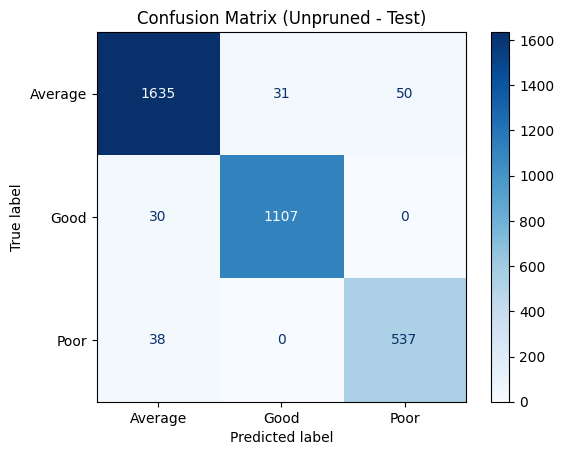

In [67]:

unpruned_tree = DecisionTreeClassifier()
unpruned_tree.fit(X_train, y_train)

evaluate_model(unpruned_tree, X_train, y_train, 'Unpruned - Train')
evaluate_model(unpruned_tree, X_test, y_test, 'Unpruned - Test')

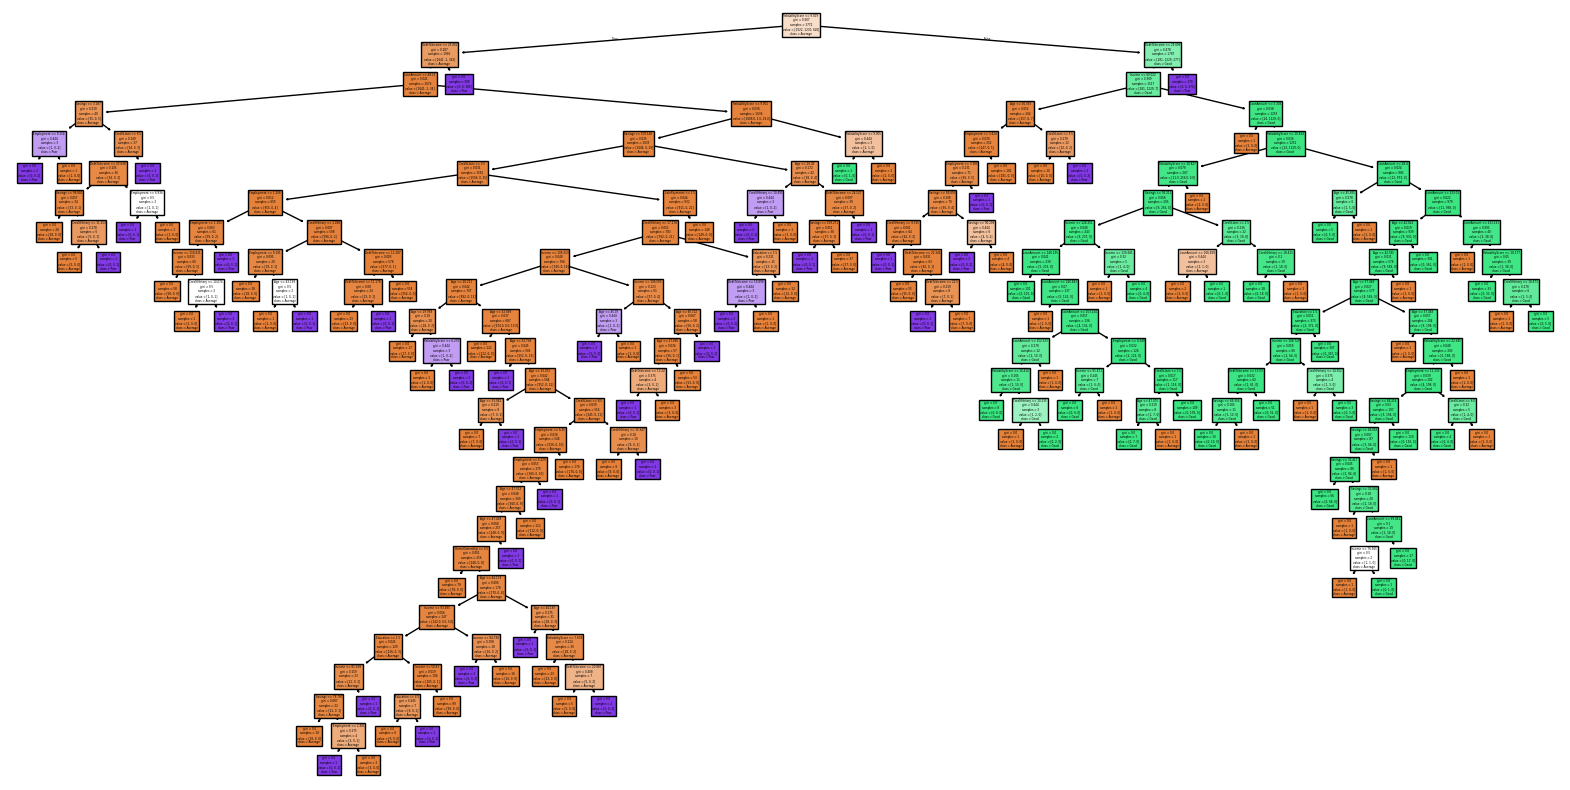

In [52]:
plt.figure(figsize=(20,10))
plot_tree(unpruned_tree, feature_names=X_train.columns, class_names=unpruned_tree.classes_, filled=True)

plt.show()

Classification Report (Normalized - Train):
               precision    recall  f1-score   support

     Average       0.98      0.99      0.98      1922
        Good       0.98      1.00      0.99      1230
        Poor       1.00      0.93      0.97       620

    accuracy                           0.98      3772
   macro avg       0.99      0.97      0.98      3772
weighted avg       0.98      0.98      0.98      3772



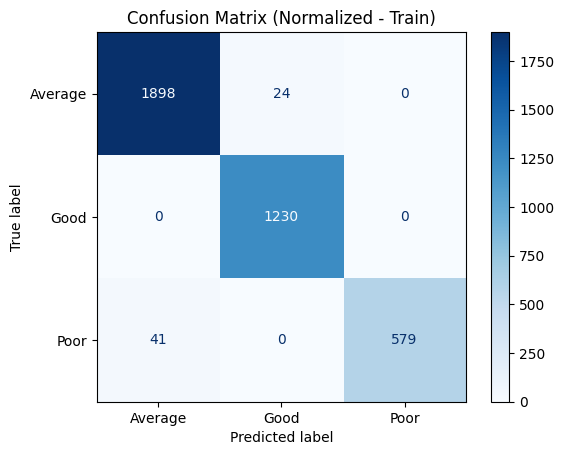

Classification Report (Normalized - Test):
               precision    recall  f1-score   support

     Average       0.98      0.98      0.98      1716
        Good       0.97      1.00      0.98      1137
        Poor       1.00      0.93      0.96       575

    accuracy                           0.98      3428
   macro avg       0.98      0.97      0.98      3428
weighted avg       0.98      0.98      0.98      3428



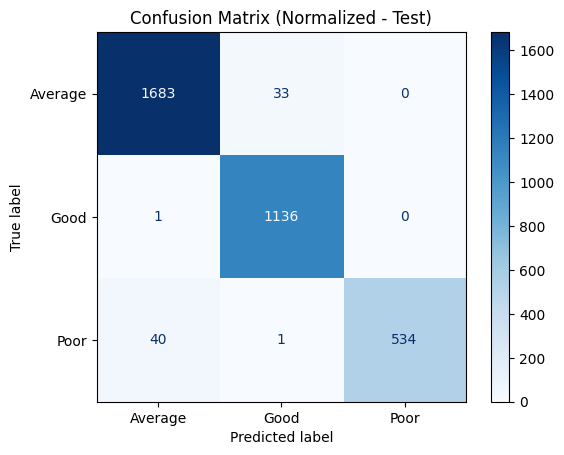

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

norm_tree = DecisionTreeClassifier(**grid.best_params_)
norm_tree.fit(X_train_scaled, y_train)

evaluate_model(norm_tree, X_train_scaled, y_train, 'Normalized - Train')
evaluate_model(norm_tree, X_test_scaled, y_test, 'Normalized - Test')

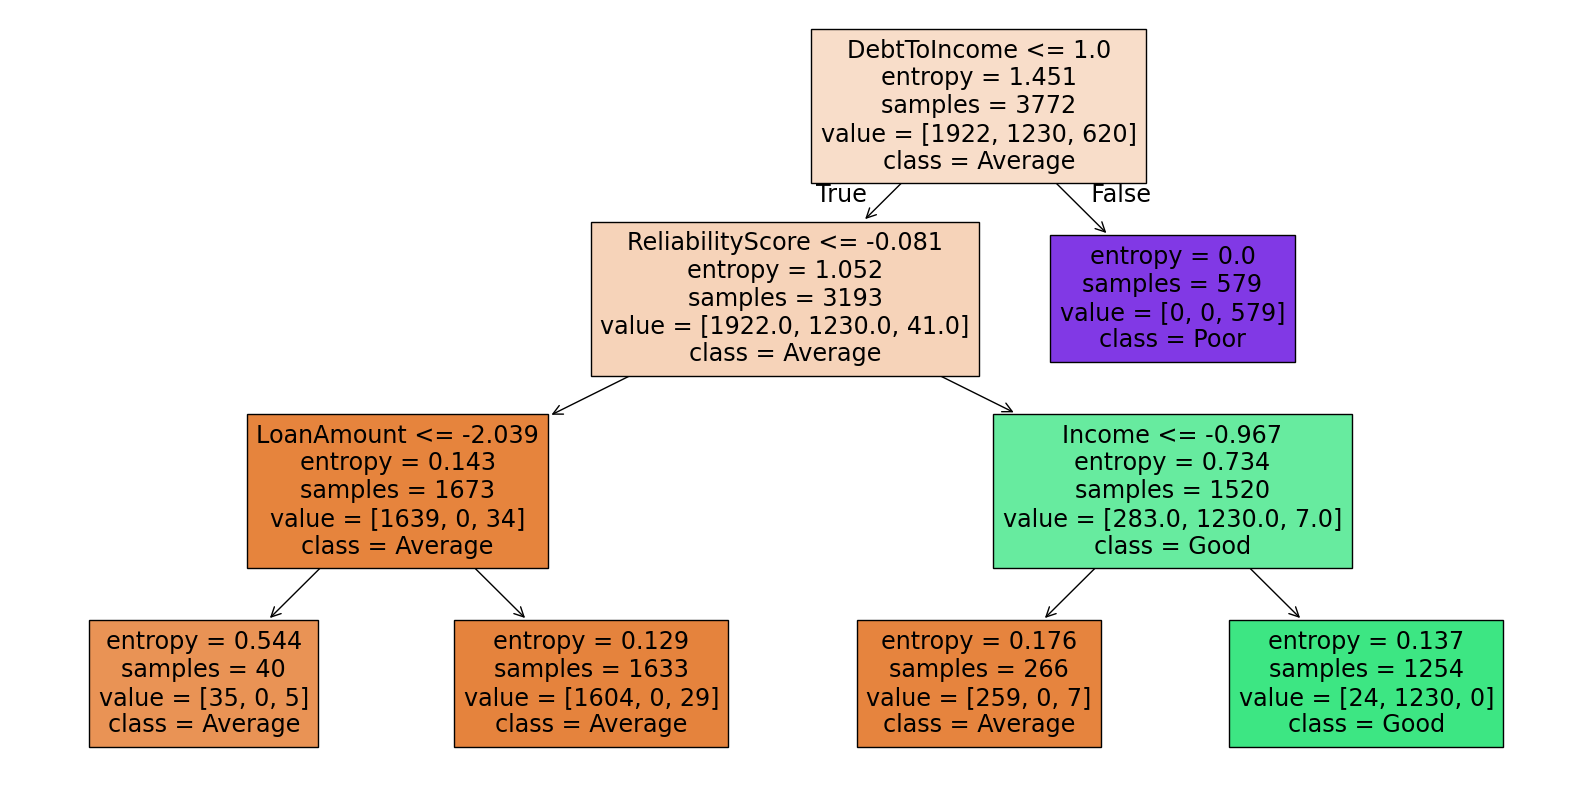

In [69]:
plt.figure(figsize=(20,10))
plot_tree(norm_tree, feature_names=X_train.columns, class_names=unpruned_tree.classes_, filled=True)

plt.show()

<ipython-input-70-ae6a4aa568fe>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = train_df.groupby('Risk_Label').apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)


Classification Report (Balanced - Train):
               precision    recall  f1-score   support

     Average       0.94      0.99      0.96       620
        Good       0.99      1.00      0.99       620
        Poor       1.00      0.93      0.97       620

    accuracy                           0.97      1860
   macro avg       0.97      0.97      0.97      1860
weighted avg       0.97      0.97      0.97      1860



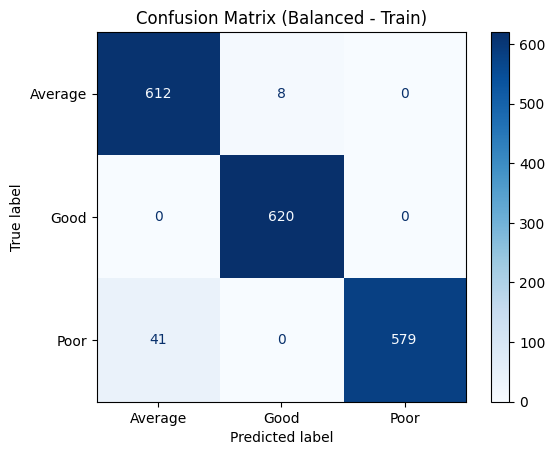

Classification Report (Balanced - Test):
               precision    recall  f1-score   support

     Average       0.97      0.98      0.98      1716
        Good       0.97      1.00      0.98      1137
        Poor       1.00      0.93      0.96       575

    accuracy                           0.98      3428
   macro avg       0.98      0.97      0.97      3428
weighted avg       0.98      0.98      0.98      3428



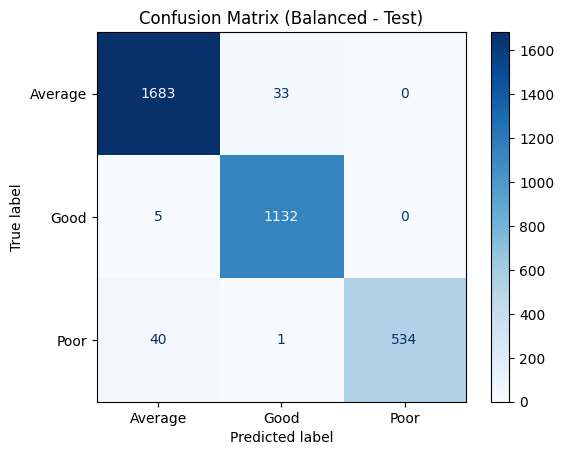

In [70]:
# Balance training set
min_class_size = y_train.value_counts().min()
balanced_df = train_df.groupby('Risk_Label').apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)

X_bal = balanced_df.drop(columns=['Risk_Label'])
y_bal = balanced_df['Risk_Label']

# Train on balanced data
balanced_tree = DecisionTreeClassifier(**grid.best_params_)
balanced_tree.fit(X_bal, y_bal)

evaluate_model(balanced_tree, X_bal, y_bal, 'Balanced - Train')
evaluate_model(balanced_tree, X_test, y_test, 'Balanced - Test')

From Scratch

In [89]:
import pandas as pd

# Load CSV files
train_df = pd.read_csv('/content/train_credit_data.csv')
test_df = pd.read_csv('/content/test_credit_data.csv')

# Split features and labels
X_train_df = train_df.drop(columns=['Risk_Label'])
y_train = train_df['Risk_Label'].tolist()

X_test_df = test_df.drop(columns=['Risk_Label'])
y_test = test_df['Risk_Label'].tolist()

# Convert DataFrames to plain lists (for scratch classifier)
X_train = X_train_df.values.tolist()
X_test = X_test_df.values.tolist()

In [107]:
from collections import Counter
import math

class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature              # index of the feature to split
        self.threshold = threshold          # split value
        self.left = left                    # left subtree
        self.right = right                  # right subtree
        self.value = value                  # predicted class at leaf

    def is_leaf_node(self):
        return self.value is not None

class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self.grow_tree(X, y)

    def entropy(self, y):
        hist = Counter(y)
        total = len(y)
        return -sum((count/total) * math.log2(count/total) for count in hist.values())

    def information_gain(self, y, left_y, right_y):
        p = len(left_y) / len(y)
        return self.entropy(y) - p * self.entropy(left_y) - (1 - p) * self.entropy(right_y)

    def best_split(self, X, y):
        best_gain = -1
        split_idx, split_thresh = None, None
        n_features = len(X[0])

        for feature_idx in range(n_features):
            values = set([x[feature_idx] for x in X])
            for threshold in values:
                left_y = [y[i] for i in range(len(y)) if X[i][feature_idx] <= threshold]
                right_y = [y[i] for i in range(len(y)) if X[i][feature_idx] > threshold]
                if len(left_y) == 0 or len(right_y) == 0:
                    continue
                gain = self.information_gain(y, left_y, right_y)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    def grow_tree(self, X, y, depth=0):
        num_samples = len(y)
        num_labels = len(set(y))


        if (depth >= self.max_depth or
            num_labels == 1 or
            num_samples < self.min_samples_split):
            leaf_value = self.most_common_label(y)
            return DecisionTreeNode(value=leaf_value)

        feat_idx, threshold = self.best_split(X, y)
        if feat_idx is None:
            return DecisionTreeNode(value=self.most_common_label(y))


        left_X = [X[i] for i in range(len(X)) if X[i][feat_idx] <= threshold]
        left_y = [y[i] for i in range(len(X)) if X[i][feat_idx] <= threshold]
        right_X = [X[i] for i in range(len(X)) if X[i][feat_idx] > threshold]
        right_y = [y[i] for i in range(len(X)) if X[i][feat_idx] > threshold]

        left_node = self.grow_tree(left_X, left_y, depth + 1)
        right_node = self.grow_tree(right_X, right_y, depth + 1)
        return DecisionTreeNode(feature=feat_idx, threshold=threshold, left=left_node, right=right_node)

    def most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        return [self.traverse_tree(x, self.root) for x in X]

    def traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self.traverse_tree(x, node.left)
        else:
            return self.traverse_tree(x, node.right)

In [108]:
tree = DecisionTreeClassifierScratch(max_depth=3, min_samples_split=2)
tree.fit(X_train, y_train)
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

In [112]:


# Evaluate the model using scikit-learn's metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report (Train Set):")
print(classification_report(y_train, y_pred_train))



print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))



Classification Report (Train Set):
              precision    recall  f1-score   support

     Average       0.98      0.99      0.98      1922
        Good       0.98      1.00      0.99      1230
        Poor       1.00      0.93      0.97       620

    accuracy                           0.98      3772
   macro avg       0.99      0.97      0.98      3772
weighted avg       0.98      0.98      0.98      3772

Classification Report (Test Set):
              precision    recall  f1-score   support

     Average       0.98      0.98      0.98      1716
        Good       0.97      1.00      0.99      1137
        Poor       1.00      0.93      0.96       575

    accuracy                           0.98      3428
   macro avg       0.98      0.97      0.98      3428
weighted avg       0.98      0.98      0.98      3428



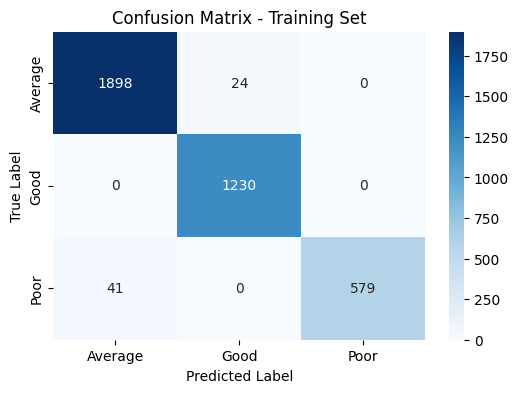

....................................


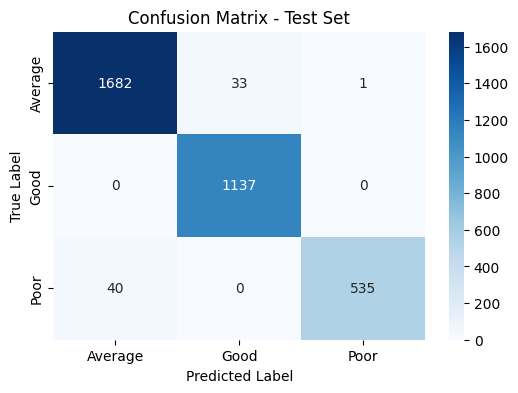

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices for training and test sets
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Define the class labels (assuming they are the unique values in y_train)
classes = sorted(list(set(y_train)))

# Plot confusion matrix for the training set
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Training Set")
plt.show()

print("....................................")
# Plot confusion matrix for the test set
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set")
plt.show()

In [98]:
from graphviz import Digraph

def draw_tree(node, feature_names, dot=None, node_id=0):
    if dot is None:
        dot = Digraph()

    current_id = str(node_id)

    if node.is_leaf_node():
        dot.node(current_id, f"Predict: {node.value}", shape="box")
    else:
        label = f"{feature_names[node.feature]} <= {node.threshold:.2f}"
        dot.node(current_id, label)

        # Left child
        left_id = str(node_id * 2 + 1)
        dot.edge(current_id, left_id, label="True")
        draw_tree(node.left, feature_names, dot, node_id * 2 + 1)

        # Right child
        right_id = str(node_id * 2 + 2)
        dot.edge(current_id, right_id, label="False")
        draw_tree(node.right, feature_names, dot, node_id * 2 + 2)

    return dot

In [99]:
dot = draw_tree(tree.root, list(X_train_df.columns))
dot.render("my_tree", format="png", cleanup=True)
dot.view()

'my_tree.pdf'

In [117]:
import numpy
import pandas
import random

def trainTestSplit(dataFrame, testSize):
    if isinstance(testSize, float):
        testSize = round(testSize * len(dataFrame))
    indices = dataFrame.index.tolist()
    testIndices = random.sample(population=indices, k=testSize)
    dataFrameTest = dataFrame.loc[testIndices]
    dataFrameTrain = dataFrame.drop(testIndices)
    return dataFrameTrain, dataFrameTest

def checkPurity(data):
    return len(numpy.unique(data[:, -1])) == 1

def classifyData(data):
    uniqueClasses, uniqueClassesCounts = numpy.unique(data[:, -1], return_counts=True)
    return uniqueClasses[uniqueClassesCounts.argmax()]

def getPotentialSplits(data, randomAttributes=None):
    potentialSplits = {}
    _, columns = data.shape
    columnsIndices = list(range(columns - 1))

    if randomAttributes is not None and len(randomAttributes) <= len(columnsIndices):
        columnsIndices = randomAttributes

    for column in columnsIndices:
        values = data[:, column]
        uniqueValues = numpy.unique(values)

        if len(uniqueValues) == 1:
            potentialSplits[column] = uniqueValues
        else:
            potentialSplits[column] = [(uniqueValues[i] + uniqueValues[i - 1]) / 2 for i in range(1, len(uniqueValues))]

    return potentialSplits

def splitData(data, splitColumn, splitValue):
    splitColumnValues = data[:, splitColumn]
    return data[splitColumnValues <= splitValue], data[splitColumnValues > splitValue]

def calculateEntropy(data):
    _, uniqueClassesCounts = numpy.unique(data[:, -1], return_counts=True)
    probabilities = uniqueClassesCounts / uniqueClassesCounts.sum()
    return sum(probabilities * -numpy.log2(probabilities))

def calculateInformationGain(data, dataBelow, dataAbove):
    parentEntropy = calculateEntropy(data)
    pBelow = len(dataBelow) / len(data)
    pAbove = len(dataAbove) / len(data)

    overallEntropy = pBelow * calculateEntropy(dataBelow) + pAbove * calculateEntropy(dataAbove)
    return parentEntropy - overallEntropy  # Information Gain

def determineBestSplit(data, potentialSplits, randomSplits=None):
    bestInformationGain = -float("inf")
    bestSplitColumn = None
    bestSplitValue = None

    if randomSplits is None:
        for splitColumn in potentialSplits:
            for splitValue in potentialSplits[splitColumn]:
                dataBelow, dataAbove = splitData(data, splitColumn, splitValue)
                if len(dataBelow) == 0 or len(dataAbove) == 0:
                    continue  # Avoid empty splits

                currentInformationGain = calculateInformationGain(data, dataBelow, dataAbove)

                if currentInformationGain > bestInformationGain:
                    bestInformationGain = currentInformationGain
                    bestSplitColumn = splitColumn
                    bestSplitValue = splitValue
    else:
        for _ in range(randomSplits):
            randomSplitColumn = random.choice(list(potentialSplits))
            randomSplitValue = random.choice(potentialSplits[randomSplitColumn])
            dataBelow, dataAbove = splitData(data, randomSplitColumn, randomSplitValue)

            if len(dataBelow) == 0 or len(dataAbove) == 0:
                continue

            currentInformationGain = calculateInformationGain(data, dataBelow, dataAbove)

            if currentInformationGain > bestInformationGain:
                bestInformationGain = currentInformationGain
                bestSplitColumn = randomSplitColumn
                bestSplitValue = randomSplitValue

    return bestSplitColumn, bestSplitValue

def buildDecisionTree(dataFrame, currentDepth=0, minSampleSize=2, maxDepth=3, randomAttributes=None, randomSplits=None):
    if currentDepth == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = dataFrame.columns
        data = dataFrame.values

        if randomAttributes is not None and randomAttributes <= len(COLUMN_HEADERS) - 1:
            randomAttributes = random.sample(population=list(range(len(COLUMN_HEADERS) - 1)), k=randomAttributes)
        else:
            randomAttributes = None
    else:
        data = dataFrame

    if checkPurity(data) or len(data) < minSampleSize or currentDepth == maxDepth:
        return classifyData(data)

    currentDepth += 1
    potentialSplits = getPotentialSplits(data, randomAttributes)
    splitColumn, splitValue = determineBestSplit(data, potentialSplits, randomSplits)

    dataBelow, dataAbove = splitData(data, splitColumn, splitValue)
    if len(dataBelow) == 0 or len(dataAbove) == 0:
        return classifyData(data)

    question = str(COLUMN_HEADERS[splitColumn]) + " <= " + str(splitValue)
    decisionSubTree = {question: []}

    yesAnswer = buildDecisionTree(dataBelow, currentDepth, minSampleSize, maxDepth, randomAttributes, randomSplits)
    noAnswer = buildDecisionTree(dataAbove, currentDepth, minSampleSize, maxDepth, randomAttributes, randomSplits)

    if yesAnswer == noAnswer:
        decisionSubTree = yesAnswer
    else:
        decisionSubTree[question].append(yesAnswer)
        decisionSubTree[question].append(noAnswer)

    return decisionSubTree

def classifySample(sample, decisionTree):
    if not isinstance(decisionTree, dict):
        return decisionTree

    question = list(decisionTree.keys())[0]
    attribute, value = question.split(" <= ")

    if sample[attribute] <= float(value):
        answer = decisionTree[question][0]
    else:
        answer = decisionTree[question][1]

    return classifySample(sample, answer)

def decisionTreePredictions(dataFrame, decisionTree):
    return dataFrame.apply(classifySample, axis=1, args=(decisionTree,))

def calculateAccuracy(predictedResults, actualResults):
    return (predictedResults == actualResults).mean()


In [115]:
import pandas as pd

# Load training data
trainData = pd.read_csv("/content/train_credit_data.csv")

# Load testing data
testData = pd.read_csv("/content/test_credit_data.csv")

# Check the first few rows to verify
print("Train Data:\n", trainData.head())
print("Test Data:\n", testData.head())


Train Data:
        Income  DebtToIncome  CreditHistory  LatePayments  Employment  \
0  101.692304      6.046014      12.538993             2    3.371397   
1   65.263115     20.920108      16.524981             2    2.558994   
2   83.760685     20.932257       6.834911             0    5.294267   
3   73.293188     16.535676      12.673553             0    1.043815   
4   76.857072     19.444921      10.359301             2    0.000000   

   CreditLines  LoanAmount  HomeOwnership        Age    Savings  Education  \
0            2  223.749888              0  29.654235  63.632573          3   
1            4   39.948799              1  42.493071  61.098483          2   
2            2  206.694898              1  41.379374  82.461972          4   
3            4  120.734710              1  50.546432  80.630408          2   
4            7   97.532696              0  29.366066  39.001485          3   

   ReliabilityScore Risk_Label  
0          4.387126    Average  
1          5.378843

In [118]:
decisionTree = buildDecisionTree(trainData)


KeyboardInterrupt: 

In [ ]:
predictions = decisionTreePredictions(testData, decisionTree)


In [ ]:

accuracy = calculateAccuracy(predictions, testData.iloc[:, -1])
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")


In [119]:
import numpy as np
import pandas as pd
import random
from collections import Counter

class DecisionTreeClassifier:
    def __init__(self, max_depth=3, min_samples_split=2, random_attributes=None, random_splits=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_attributes = random_attributes
        self.random_splits = random_splits
        self.tree = None

    def fit(self, data):
        self.column_headers = data.columns
        self.tree = self._build_tree(data.values, depth=0)

    def predict(self, data):
        return data.apply(self._classify_sample, axis=1, args=(self.tree,))

    def _build_tree(self, data, depth):
        if self._check_purity(data) or len(data) < self.min_samples_split or depth == self.max_depth:
            return self._classify_data(data)

        depth += 1
        potential_splits = self._get_potential_splits(data)
        split_column, split_value = self._determine_best_split(data, potential_splits)

        data_left, data_right = self._split_data(data, split_column, split_value)
        if len(data_left) == 0 or len(data_right) == 0:
            return self._classify_data(data)

        question = f"{self.column_headers[split_column]} <= {split_value}"
        subtree = {question: []}

        left_branch = self._build_tree(data_left, depth)
        right_branch = self._build_tree(data_right, depth)

        if left_branch == right_branch:
            return left_branch

        subtree[question].append(left_branch)
        subtree[question].append(right_branch)

        return subtree

    def _check_purity(self, data):
        return len(np.unique(data[:, -1])) == 1

    def _classify_data(self, data):
        labels, counts = np.unique(data[:, -1], return_counts=True)
        return labels[np.argmax(counts)]

    def _get_potential_splits(self, data):
        potential_splits = {}
        _, num_columns = data.shape
        feature_indices = list(range(num_columns - 1))

        if self.random_attributes:
            feature_indices = random.sample(feature_indices, min(self.random_attributes, len(feature_indices)))

        for column in feature_indices:
            unique_values = np.unique(data[:, column])
            if len(unique_values) > 1:
                potential_splits[column] = [(unique_values[i] + unique_values[i - 1]) / 2 for i in range(1, len(unique_values))]

        return potential_splits

    def _split_data(self, data, column, value):
        left = data[data[:, column] <= value]
        right = data[data[:, column] > value]
        return left, right

    def _calculate_entropy(self, data):
        _, counts = np.unique(data[:, -1], return_counts=True)
        probabilities = counts / counts.sum()
        return -np.sum(probabilities * np.log2(probabilities))

    def _information_gain(self, data, left, right):
        p_left = len(left) / len(data)
        p_right = len(right) / len(data)
        return self._calculate_entropy(data) - (p_left * self._calculate_entropy(left) + p_right * self._calculate_entropy(right))

    def _determine_best_split(self, data, potential_splits):
        best_gain = -1
        best_column, best_value = None, None

        for column, values in potential_splits.items():
            for value in values:
                left, right = self._split_data(data, column, value)
                if len(left) == 0 or len(right) == 0:
                    continue

                gain = self._information_gain(data, left, right)
                if gain > best_gain:
                    best_gain = gain
                    best_column = column
                    best_value = value

        return best_column, best_value

    def _classify_sample(self, sample, tree):
        if not isinstance(tree, dict):
            return tree

        question = list(tree.keys())[0]
        feature, value = question.split(" <= ")
        value = float(value)

        if sample[feature] <= value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

        return self._classify_sample(sample, answer)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)




model = DecisionTreeClassifier(max_depth=3)
model.fit(train_df)
predictions = model.predict(test_df)

acc = model.accuracy(test_df.iloc[:, -1], predictions)
print(f"Accuracy: {acc * 100:.2f}%")


Accuracy: 97.81%


In [125]:
# Predictions for Train and Test Data
y_train_true = train_df.iloc[:, -1]  # Actual labels (Train)
y_train_pred = model.predict(train_df)  # Predicted labels (Train)

y_test_true = test_df.iloc[:, -1]  # Actual labels (Test)
y_test_pred = model.predict(test_df)  # Predicted labels (Test)

# Compute Metrics for Training Data
train_accuracy = accuracy_score(y_train_true, y_train_pred)
train_precision = precision_score(y_train_true, y_train_pred, average="weighted")
train_recall = recall_score(y_train_true, y_train_pred, average="weighted")
train_f1 = f1_score(y_train_true, y_train_pred, average="weighted")
train_confusion = confusion_matrix(y_train_true, y_train_pred)

# Compute Metrics for Testing Data
test_accuracy = accuracy_score(y_test_true, y_test_pred)
test_precision = precision_score(y_test_true, y_test_pred, average="weighted")
test_recall = recall_score(y_test_true, y_test_pred, average="weighted")
test_f1 = f1_score(y_test_true, y_test_pred, average="weighted")
test_confusion = confusion_matrix(y_test_true, y_test_pred)

# Print Results
print("\n=== Training Metrics ===")
print(f"Accuracy: {train_accuracy * 100:.2f}%")
print(f"Precision: {train_precision * 100:.2f}%")
print(f"Recall: {train_recall * 100:.2f}%")
print(f"F1-Score (Fq): {train_f1 * 100:.2f}%")
print("Confusion Matrix (Train):\n", train_confusion)

print("\n=== Testing Metrics ===")
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {test_precision * 100:.2f}%")
print(f"Recall: {test_recall * 100:.2f}%")
print(f"F1-Score (Fq): {test_f1 * 100:.2f}%")
print("Confusion Matrix (Test):\n", test_confusion)



=== Training Metrics ===
Accuracy: 98.28%
Precision: 98.30%
Recall: 98.28%
F1-Score (Fq): 98.27%
Confusion Matrix (Train):
 [[1898   24    0]
 [   0 1230    0]
 [  41    0  579]]

=== Testing Metrics ===
Accuracy: 97.81%
Precision: 97.85%
Recall: 97.81%
F1-Score (Fq): 97.80%
Confusion Matrix (Test):
 [[1683   33    0]
 [   1 1136    0]
 [  40    1  534]]



=== Training Confusion Matrix ===


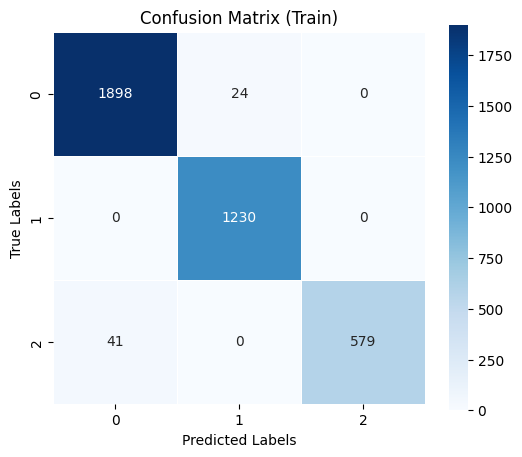


=== Testing Confusion Matrix ===


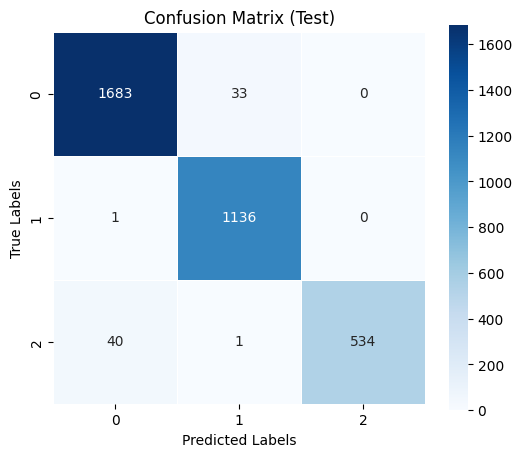

In [127]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to plot Confusion Matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

# Predictions for Train and Test Data
y_train_true = train_df.iloc[:, -1]  # Actual labels (Train)
y_train_pred = model.predict(train_df)  # Predicted labels (Train)

y_test_true = test_df.iloc[:, -1]  # Actual labels (Test)
y_test_pred = model.predict(test_df)  # Predicted labels (Test)

# Compute Metrics for Training Data
train_confusion = confusion_matrix(y_train_true, y_train_pred)

# Compute Metrics for Testing Data
test_confusion = confusion_matrix(y_test_true, y_test_pred)

# Print Results
print("\n=== Training Confusion Matrix ===")
plot_confusion_matrix(train_confusion, "Confusion Matrix (Train)")

print("\n=== Testing Confusion Matrix ===")
plot_confusion_matrix(test_confusion, "Confusion Matrix (Test)")


In [128]:
from graphviz import Digraph

def draw_tree(tree, feature_names, dot=None, node_id=0):
    """ Recursively draws the decision tree using Graphviz """
    if dot is None:
        dot = Digraph()

    current_id = str(node_id)

    if not isinstance(tree, dict):  # If it's a leaf node
        dot.node(current_id, f"Predict: {tree}", shape="box")
        return dot

    # Extract decision question
    question = list(tree.keys())[0]
    feature, threshold = question.split(" <= ")
    label = f"{feature} <= {threshold}"

    # Add decision node
    dot.node(current_id, label, shape="ellipse")

    left_child = tree[question][0]
    right_child = tree[question][1]

    # Left branch
    left_id = str(node_id * 2 + 1)
    dot.edge(current_id, left_id, label="True")
    draw_tree(left_child, feature_names, dot, node_id * 2 + 1)

    # Right branch
    right_id = str(node_id * 2 + 2)
    dot.edge(current_id, right_id, label="False")
    draw_tree(right_child, feature_names, dot, node_id * 2 + 2)

    return dot


# Generate and save the decision tree plot
dot = draw_tree(model.tree, train_df.columns[:-1])  # Exclude target column
dot.render("decision_tree", format="png", cleanup=True)
dot.view()


'decision_tree.pdf'

In [123]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(test_df.iloc[:, -1], predictions)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 97.81%


In [124]:
# Predictions
y_true = test_df.iloc[:, -1]  # Actual labels
y_pred = model.predict(test_df)  # Predicted labels
# Compute Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")  # Weighted for multi-class
recall = recall_score(y_true, y_pred, average="weighted")  # Weighted for multi-class
f1 = f1_score(y_true, y_pred, average="weighted")  # Weighted for multi-class

# Print Results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score (Fq): {f1 * 100:.2f}%")

Accuracy: 97.81%
Precision: 97.85%
Recall: 97.81%
F1-Score (Fq): 97.80%
